# Homework 3 - Part 1

CSYE7105 Instructor: Dr. Handan Liu

<b>Name: Anshul Chaudhary</b>
    
<b>NUID: 002820096</b>

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Installations

In [2]:
!pip install numpy==1.26.4 pandas dask matplotlib

Defaulting to user installation because normal site-packages is not writeable


### Import statements

In [3]:
import numpy as np
import dask.array as da
import time
import matplotlib.pyplot as plt

### Part 1: 30 points

#### 1. Create a numpy array by using random number generator as this: seed is 1, random integer numbers in [1,10) with the shape is 30000x20000. Then set a timer to calculate the mean of every row. (5 pts)

In [4]:
# set random seed as 1
np.random.seed(1)

In [5]:
# generate a random integer array with values in range [1,10) and shape 30000 x 20000
array = np.random.randint(1, 10, size=(30000, 20000))

In [6]:
# display array
print("Numpy array: \n", array)
print("Numpy array shape: ", array.shape)

Numpy array: 
 [[6 9 6 ... 7 2 9]
 [4 1 5 ... 2 4 9]
 [6 2 8 ... 6 5 4]
 ...
 [6 2 5 ... 3 6 7]
 [3 5 9 ... 7 4 6]
 [3 8 5 ... 8 7 5]]
Numpy array shape:  (30000, 20000)


In [7]:
# time the calculatation of mean for every row.

# Start the timer
start_time = time.time()

# calculate the mean of each row
row_means = array.mean(axis=1)

# End the timer
numpy_time = time.time() - start_time

In [8]:
# Display time taken for NumPy operation
print("Time taken to calculate row-wise mean with NumPy:", numpy_time, "seconds")

Time taken to calculate row-wise mean with NumPy: 0.9316987991333008 seconds


#### 2. Use the same array in dask, and set the chunksize is (1000, 1000) to get a dask array. Assume da4 is the name of this dask array in this case. (4 points)

In [9]:
# Create a Dask array from the NumPy array with chunks of size (1000, 1000)
da4 = da.from_array(array, chunks=(1000, 1000))

In [10]:
# display dask array
print("Dask Array - da4:", da4)
print("Shape:", da4.shape)
print("Chunks:", da4.chunksize)
print("Data type:", da4.dtype)

Dask Array - da4: dask.array<array, shape=(30000, 20000), dtype=int64, chunksize=(1000, 1000), chunktype=numpy.ndarray>
Shape: (30000, 20000)
Chunks: (1000, 1000)
Data type: int64


#### 3. Use numpy method to calculate the size of da4 and the size of this chunk array (1000, 1000), then compare your calculations with the result about Bytes of Array and Chunk of da4.             (4 pts)

In [11]:
# calculate total size of the array (in bytes) using NumPy method
calculated_size_bytes = array.size * array.itemsize

In [12]:
# calculate the size of one chunk (1000x1000) in bytes
calculated_chunk_size_bytes = 1000 * 1000 * array.itemsize

In [13]:
# Dask array size
dask_size_bytes = da4.nbytes

In [14]:
# Dask array chunk size
dask_chunk_size = da4.chunksize[0] * da4.chunksize[1] * da4.itemsize

In [15]:
# Display calculated sizes and compare with Dask's automatic calculations
print("Total Array Size (calculated):", calculated_size_bytes, "Bytes")
print("Chunk Size (calculated for 1000x1000):", calculated_chunk_size_bytes, "Bytes")
print("Dask Array Size (Dask-calculated):", dask_size_bytes, "Bytes")
print("Dask Chunk Size (Dask-calculated):", dask_chunk_size, "Bytes")

Total Array Size (calculated): 4800000000 Bytes
Chunk Size (calculated for 1000x1000): 8000000 Bytes
Dask Array Size (Dask-calculated): 4800000000 Bytes
Dask Chunk Size (Dask-calculated): 8000000 Bytes


In [16]:
# compute the chunk size of dask
da4.compute_chunk_sizes()

dask.array<array, shape=(30000, 20000), dtype=int64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

Comparison:

- Calculated Array Size: calculated 4800000000 Bytes (4.47 GiB) matches Dask (4.47 GiB).
- calculated Chunk Size: calculated 8000000 Bytes (7.63 MiB) matches Dask (7.63 MiB).

The manual calculations align perfectly with Dask’s computed values for both the total array size and the chunk size


#### 4. Set timers to calculate da4 with different “chunks”: (17 pts)

- set the size of “chunks” to (1000, 1000).    (2 pts)
- set the size of “chunks” to (3000, 2000).    (2 pts)
- set the size of “chunks” to (300, 200)         (2 pts)
- Plot a bin graph of the time with above different “chunks” (5 pts); and analyze the reason.    (6 pts)

In [17]:
def compute_dask_mean_with_chunk(array, chunk_size):
    # Convert array to Dask with specified chunk size
    da_array = da.from_array(array, chunks=chunk_size)
    start_time = time.time()
    # Calculate the mean of each row and trigger computation
    row_means = da_array.mean(axis=1).compute()
    return time.time() - start_time

In [18]:
chunk_sizes = [(1000, 1000), (3000, 2000), (300, 200)]
times = []

In [19]:
for chunk_size in chunk_sizes:
    time_taken = compute_dask_mean_with_chunk(array, chunk_size)
    times.append(time_taken)
    print(f"Time taken with chunk size {chunk_size}: {time_taken} seconds")

Time taken with chunk size (1000, 1000): 0.27800774574279785 seconds
Time taken with chunk size (3000, 2000): 0.16706395149230957 seconds
Time taken with chunk size (300, 200): 3.518932819366455 seconds


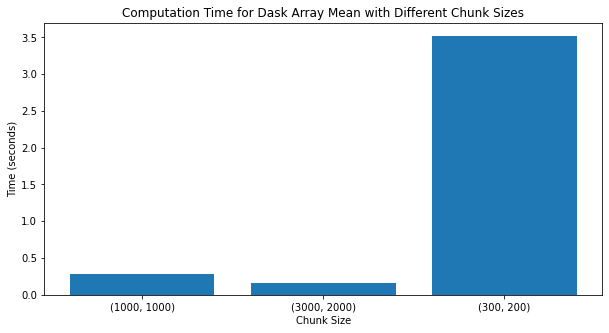

In [20]:
# Bar Chart comparing different Dask Chunk Size
plt.figure(figsize=(10, 5))
plt.bar(["(1000, 1000)", "(3000, 2000)", "(300, 200)"], times)

# Add title and labels
plt.title("Computation Time for Dask Array Mean with Different Chunk Sizes")
plt.xlabel("Chunk Size")
plt.ylabel("Time (seconds)")

# Show the plot
plt.show()

In [21]:
# appending value for np array to display on graph
graph_labels = []
data_points = []

# add points for no chunk
graph_labels.append("np array")
data_points.append(numpy_time)

for i in range(len(chunk_sizes)):
    graph_labels.append("dask with chunk: " + str(chunk_sizes[i]))
    data_points.append(times[i])
    

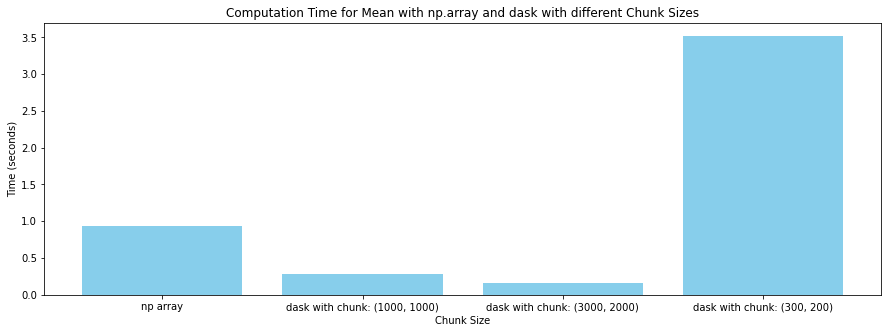

In [22]:
# Comparing NP and Dask with different chunk sizes 
plt.figure(figsize=(15, 5))
plt.bar(graph_labels, data_points, color='skyblue')

# Add title and labels
plt.title("Computation Time for Mean with np.array and dask with different Chunk Sizes")
plt.xlabel("Chunk Size")
plt.ylabel("Time (seconds)")

# Show the plot
plt.show()

Analysis:

- **Larger Chunks Improve Performance**: The fastest execution time was achieved with the largest chunk size (3000, 2000), which minimized the number of tasks Dask needed to manage, reducing task overhead significantly.

- **Medium-Sized Chunks as a Balanced Option**: The (1000, 1000) chunk size provided a balance between performance and memory usage, making it a good compromise for systems with moderate memory availability.

- **Increased Task Overhead with Smaller Chunks**: The smallest chunk size (300, 200) resulted in the slowest execution time, as the increased number of tasks created high overhead for task management, highlighting the downside of having too many small chunks.

- **Memory vs. Speed Trade-Off**: Larger chunks generally led to faster execution but also require more memory per chunk. Choosing an optimal chunk size depends on the system’s available memory and processing power.

- **Optimal Chunk Size Depends on Resource Constraints**: While (3000, 2000) was optimal here, selecting an ideal chunk size should consider memory limitations, data scale, and the system’s ability to handle larger blocks efficiently without running out of memory.